In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

df = pd.read_excel('C:\\Users\\Nobody\\Documents\\PythonAutoGenerated2.xlsx')
model = LinearRegression()
model2 = LinearRegression()
model.fit(df[["city-mpg"]] ,df[["price"]])
model2.fit(df[["city-mpg", "horsepower"]] ,df[["price"]])
print(model.intercept_)
print(model.coef_)       #y=intercept + coef*x
print(model2.intercept_)
print(model2.coef_)      #y=intercept + coef1*x1 +coef2*x2

[34595.60084278]
[[-849.45322454]]
[-1417.08885785]
[[-79.92247491 160.88688805]]


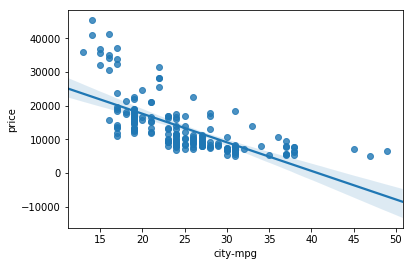

In [2]:
sb.regplot(x="city-mpg", y="price" ,data=df) #inverted relation

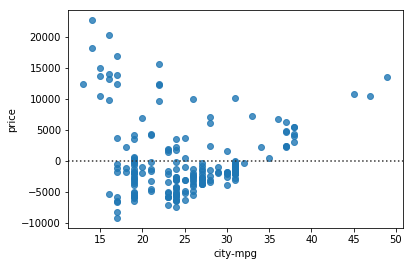

In [3]:
sb.residplot(x="city-mpg", y="price" ,data=df)

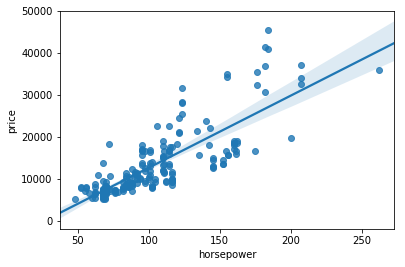

In [4]:
sb.regplot(x="horsepower", y="price" ,data=df) #Positive relation

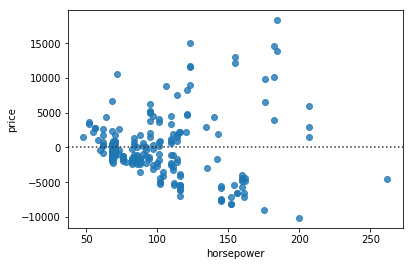

In [5]:
sb.residplot(x="horsepower", y="price" ,data=df) #It has the form of a cone, so it is not a good predictor

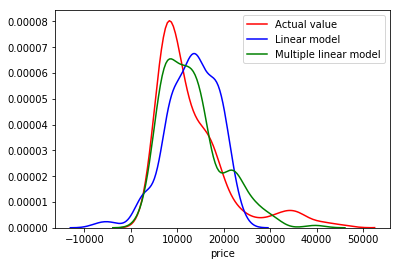

In [6]:
axx = sb.distplot(df["price"], hist=False,color = "r", label = "Actual value")
sb.distplot(model.predict(df[["city-mpg"]]),hist=False, color="b", label="Linear model",ax=axx)
sb.distplot(model2.predict(df[["city-mpg","horsepower"]]),hist=False, color="g", label="Multiple linear model",ax=axx)

In [7]:
Polmodel = np.polyfit(df["city-mpg"] ,df["price"],3)
print(np.poly1d(Polmodel))

        3       2
-2.668 x + 287 x - 1.02e+04 x + 1.275e+05


In [14]:
df["horsepower"] = df["horsepower"].astype("float64")
df["city-mpg"] = df["city-mpg"].astype("float64")
df["price"] = df["price"].astype("float64")
prt = PolynomialFeatures(degree=2, include_bias=False)
Polmodel2 = prt.fit_transform(df[["city-mpg","horsepower"]])
Instructions = [("scale",StandardScaler()),
("polynomial",PolynomialFeatures(degree=19)),("model",LinearRegression())]
PipeModel = Pipeline(Instructions)
PipeModel.fit(df[["city-mpg","horsepower"]] ,df["price"])
yhat = PipeModel.predict(df[["city-mpg","horsepower"]])


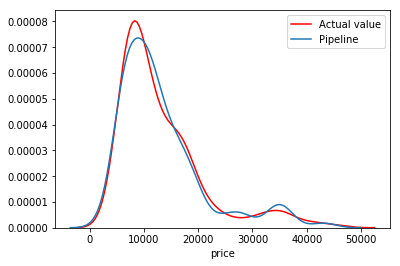

In [15]:
axy = sb.distplot(df["price"], hist=False,color = "r", label = "Actual value")
sb.distplot(yhat, hist=False, label = "Pipeline")